New features 20180810:
- User can vary density in different spot images generated from one instantiation. Nearest neighbor distance for each spot is normally distributed.*

- The list of spot coordinates to get coordinates from (instance variable) grows as needed to accomodate greater density values.

*Assignment of spots to valid coordinates is by random distribution.

# Objective
This notebook demonstrates the SpotImage tool, which generates synthetic spot images.

# The SpotImage class
The SpotImage class implements the SpotImage tool.

### Class variables
 - spot_shapes - a list of strings representing spot shapes handled by the class
 - snr_distrs - a list of strings representing SNR distributions handled by the class

### Methods
 - init
     - Description:
          - Constructor. Check parameters. Calculate and make assignments to class attributes.
     - Inputs:
          - string background image filename (bg_img_filename)
          - string color map (cmap)
          - size of the generated image (img_sz)
          - spot parameters (patch_sz, num_spots, spot_shape_params)
          - SNR distribution parameters (snr_distr_params)
          - minimum SNR reasonably detectable (snr_threshold)
          - intensity threshold (minimum intensity value of pixel on background image at valid spot locations)
     - Returns: none
 - generate_spot_image
     - Description: 
          - Generate a spot image. The spot_array and spot_img are saved as attributes of the SpotImage object for later access.
          - The spot files are saved as png images. The coordinate system for the spots has its origin at the upper left and goes x down, y right.
     - Inputs:
          - bool whether to plot the spot array
          - bool whether to plot the image array
          - bool whether to save the spot array
          - string filename for the saved spot array
          - bool whether to save the image array
          - string filename for the saved image array
     - Returns: none
 - get_spot_array_csv, get spot_img_csv, get_coord_list_csv, get_snr_list_csv
     - Description: 
          - Save csv files of spot image data for later reference as ground truth values.
     - Input:
          - string filename for the saved csv file
     - Returns: none
 - img_to_array
     - Description: 
          - Load an image into an array of gray values scaled down to img_sz x img_sz.
     - Input:
          - string filename of image
     - Returns: 
          - array of gray values, scaled down to img_sz x img_sz
 - get_valid_coords     
     - Description:
          - Get the set of coordinates where spots may be added.
          - Coordinates below self.threshold are excluded from this set.
     - Input:
          - none
     - Returns:
          - set of valid coordinates
 - get_spot_list
     - Description:
          - Generate a list of random spots. 
          - Each spot has a random location and a patch of intensity values.
     - Input:
          - none
     - Returns:
          - list of random spots
 - get_spot_coord
     - Description: Select a random spot coordinate from the list of valid spots.
     - Input:
          - none
     - Returns:
          - a random selection from self.valid_coords
 - get_patch
	 - Description:
          - Generate one 2D square array with one spot.
		  - The spot obeys spot_shape_params.
		  - The spot has an SNR sampled from the SNR distribution.
     - Inputs:
          - x coord on total array of the center pixel of the patch
          - y coord on total array of the center pixel of the patch
          - SNR of the patch
     - Returns:
          - 2D square array with one spot
 - get_snr
     - Description:
          - Sample an SNR from the specified SNR distribution.
     - Inputs:
          - none
     - Returns:
          - SNR value
 - get_noise
     - Description:
          - Get a noise (sigma) value from a square patch on the background of size patch_sz and centered on (x,y).
     - Inputs:
          - x coord as in description
          - y coord as in description
     - Returns:
          - noise (sigma) value
     - Notes:
          - Uses skimage's estimate_sigma, which assumes the noise from the background patch follows a Gaussian distribution.
 - generate_spot_array
     - Description: 
          - Generates spot_array from spot_list.
     - Inputs:
          - none
     - Returns:
          - 2D square array with all spots
 - add_spot
     - Description:
          - Adds one spot to spot_array
     - Inputs:
          - none
     - Returns:
          - spot_array

In [1]:
from SpotImage import SpotImage

In [2]:
""" 
Instantiate the SpotImage.
"""

bg_img_filename = 'MAX_ISP_300_2.tif'
cmap = 'gray'
img_sz = 300
patch_sz = 11
spot_sigma = 1.75
spot_shape_params = ['2D_Gauss', spot_sigma]

brightness_bias = False     # bias spots toward higher intensity background pixels within valid coordinate space
brightness_bias_dial = 0
biasing_method = None
global_intensity_dial = 0   # raise the threshold found by Otsu's

si = SpotImage(bg_img_filename, cmap, img_sz, patch_sz, spot_shape_params, brightness_bias, brightness_bias_dial, biasing_method, global_intensity_dial)

In [3]:
plot_spots = False
plot_img = True
save_spots = False
save_img = False
spot_img_filename = None
spots_filename = None
brightness_bias = False

num_spots = 150
snr_mu = 5
snr_sigma = 20
snr_distr_params = ['Gauss', snr_mu, snr_sigma]
snr_threshold = 3

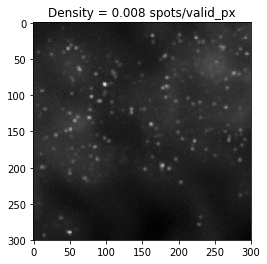

Number of spots = 451
Total_valid_pixels = 56451


In [4]:
""" 
Parameterize density and generate a spot image.
"""

density = 0.008
title = "Density = " + str(density) + " spots/valid_px"
spot_img_filename = title

si.generate_spot_image(num_spots, snr_distr_params, snr_threshold, plot_spots, plot_img, save_spots, spots_filename, save_img, spot_img_filename, density)

print("Number of spots = " + str(si.num_spots))
print("Total_valid_pixels = " + str(len(si.valid_coords)))

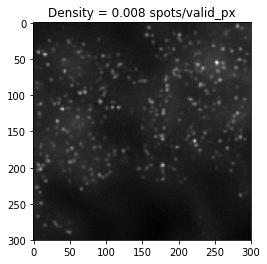

Number of spots = 903
Total_valid_pixels = 56451


In [5]:
density = 0.016
title = "Density = " + str(density) + " spots/valid_px"
spots_filename = title

si.generate_spot_image(num_spots, snr_distr_params, snr_threshold, plot_spots, plot_img, save_spots, spots_filename, save_img, spot_img_filename, density)

print("Number of spots = " + str(si.num_spots))
print("Total_valid_pixels = " + str(len(si.valid_coords)))